In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
df = sns.load_dataset('titanic')

In [57]:
df.head()

,survived,sex,age,fare,class
0,0,0,22.0,7.2500,Third
1,1,1,38.0,71.2833,First
2,1,1,26.0,7.9250,Third
3,1,1,35.0,53.1000,First
4,0,0,35.0,8.0500,Third


In [56]:
df = df.drop([ 'who'], axis=1 )


In [54]:
df['sex'] = df['sex'].replace('male', 0)
df['sex'] = df['sex'].replace('female', 1)

In [60]:
df.isnull().sum()


survived      0
sex           0
age         177
fare          0
class         0
dtype: int64

In [62]:
age_mean = df['age'].mean()

In [64]:
df['age'] = df['age'].replace(np.nan, age_mean)

In [65]:
df.isnull().sum()

survived    0
sex         0
age         0
fare        0
class       0
dtype: int64

In [78]:
df['sex'] = df['sex'].astype('int64')
df.head()

,survived,sex,age,fare,class
0,0,0,22.0,7.2500,Third
1,1,1,38.0,71.2833,First
2,1,1,26.0,7.9250,Third
3,1,1,35.0,53.1000,First
4,0,0,35.0,8.0500,Third


In [81]:
df['class'] = df['class'].replace('First', 0)
df['class'] = df['class'].replace('Second', 1)
df['class'] = df['class'].replace('Third', -1)

In [82]:
X = df[['sex', 'age', 'class']]
y = df['survived']

In [83]:
model = DecisionTreeClassifier().fit(X, y)

In [88]:
model.predict([[0, 15, 1]])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [90]:
model.score(X, y)

0.8799102132435466

In [121]:
model = DecisionTreeClassifier().fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [122]:
model.score(X_test,y_test)

0.8994413407821229

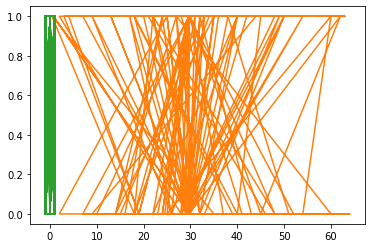

In [123]:
plt.plot(X_test, y_test)

In [124]:
pd_Value = model.predict(X_test)


In [125]:
score = accuracy_score(y_test,pd_Value)

In [126]:
score

0.8994413407821229

<AxesSubplot:ylabel='Density'>

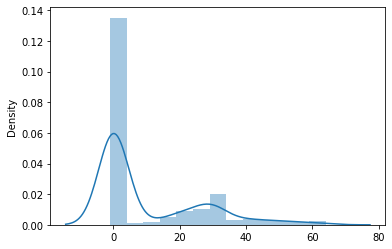

In [132]:
sns.distplot(X_test)

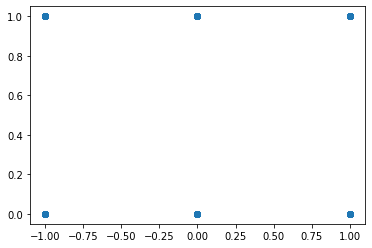

In [139]:
plt.scatter('class', 'survived' , data = df)